# Is Crime Rate Rising in US?

Afewerk Nune, Jul 3rd, 2019

# Table of Contenst
[1.0 Background](#1.0_Background)<br>
[2.0 Analysis](#2.0_Analysis)<br>
[3.0 Methodology](#3.0_Methodology)<br>
[4.0 Evaluation](#4.0_Evaluation)<br>
[5.0 Conclusion & Future Improvements](#5.0_Conclusion_&_Future_Improvements)<br> 
[References](#References)<br>

## 1.0 Background <a name="1.0_Background"/><a> 

Is crime rate rising in America? In order to answer this question, we use the FBI crime data collected from the country’s more than 18,000 police agencies. The data has annual reports from 1975 to 2015 including year, agency jurisdiction, crime, homicide, crime_percapita and homicide_percapita. We'll use this columns to explore and answer the question of whether crime rate in US is increasing or not. 


Important message from the website that may or may not affect the outcome of this analysis. 

"Acknowledgements
The crime data was acquired from the FBI Uniform Crime Reporting program's "Offenses Known and Clearances by Arrest" database for the year in question, held at the National Archives of Criminal Justice Data. The data was compiled and analyzed by Gabriel Dance, Tom Meagher, and Emily Hopkins of The Marshall Project; the analysis was published as Crime 


In [2]:
#Importing major libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from tabulate import tabulate

Here is the crime-report data which was collected from Keggel[1] we're going to use for this project

In [3]:
PATH = 'https://raw.githubusercontent.com/Afewerk/Data-Science/master/report.csv'
df = pd.read_csv(PATH)
print("\n The dataframe consists of {} number rows and {} number of columns".format(df.shape[0], df.shape[1]))

print("The top 10 rows of the data looks like this")
df.head(10)


 The dataframe consists of 2829 number rows and 15 number of columns
The top 10 rows of the data looks like this


,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10
5,1975,MD00301,"Baltimore County, MD",642154.0,1259.0,25.0,137.0,347.0,750.0,12.0,196.06,3.89,21.33,54.04,116.79
6,1975,MDBPD00,"Baltimore, MD",864100.0,16086.0,259.0,463.0,6309.0,9055.0,12.0,1861.59,29.97,53.58,730.12,1047.91
7,1975,MA01301,"Boston, MA",616120.0,11386.0,119.0,453.0,3036.0,7778.0,12.0,1848.02,19.31,73.52,492.76,1262.42
8,1975,NY01401,"Buffalo, NY",422276.0,3350.0,63.0,192.0,755.0,2340.0,12.0,793.32,14.92,45.47,178.79,554.14
9,1975,NC06001,"Charlotte, NC",262103.0,1937.0,68.0,71.0,976.0,822.0,12.0,739.02,25.94,27.09,372.37,313.62


## 2.0 Analysis <a name="2.0_Analysis"/><a> 

In [6]:
mid_year = df['report_year'].median()
print("\n The report time median that we're going to use to break the samples is ", mid_year)


 The report time median that we're going to use to break the samples is  1995.0


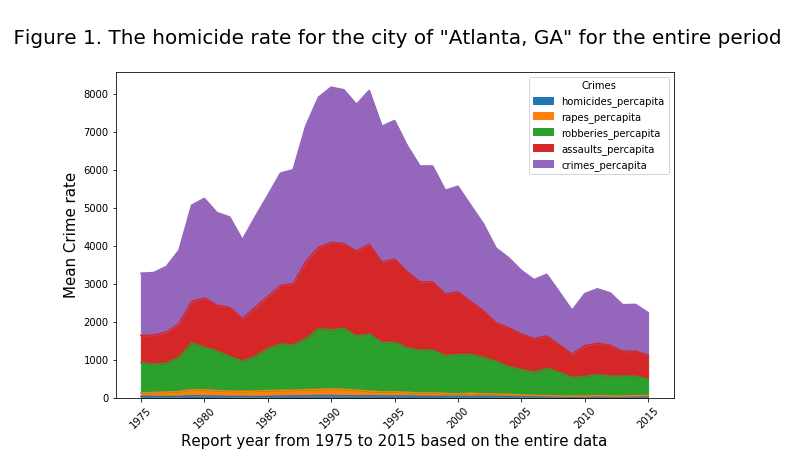

In [45]:
crime_highest = df[df.agency_jurisdiction =='Atlanta, GA'][['homicides_percapita','rapes_percapita','report_year','robberies_percapita',
                                                            'assaults_percapita','crimes_percapita',]].groupby('report_year').mean()
crime_highest.head()
crime_highest.plot(kind='area', stacked=True, rot=45, figsize=(10,6))
plt.title('\n Figure 1. The homicide rate for the city of "Atlanta, GA" for the entire period\n', size=20)
plt.ylabel('Mean Crime rate', size=15)
plt.xlabel('Report year from 1975 to 2015 based on the entire data', size=15)
plt.legend(loc='upper right',title='Crimes');


From figure 1, it shows crimes_percapita, robberies_percapita, assaults_percapita, rapes_percapita, and homicides_percapita for Atlanta, GA from 1975 to 2015. We can see that all crime areas have increased until 1990 just under 15 years, then started continuously decreasing. Atlanta city was chosen because it is the top crime populated area over cumulatively.  

You can see rate of decrease or increase changes for about 2 to 3 years, and there will be a negative change. Also, since the homicides_percapita and rapes_percapita rates are much lower than the rest, the graph doesn't show a good representation. To better understand those changes, we'll look at the rates of homicides_percapita later in the 


In [7]:
total_means =df[['population', 'crimes_percapita', 'homicides_percapita']].mean()
print("\t Total means \n {}".format(total_means))

	 Total means 
 population             795698.089130
crimes_percapita         1093.049810
homicides_percapita        15.372812
dtype: float64


To prove our analysis, we're going to use the "homicides_percapita" and breaking the data for 20 years each. The methods used to select the samples are described next in the Methodology section in detail. 

In today’s media coverage, it feels like crimes are high in US. However it’s possible that crimes may not be increasing overall, except the momentary uprising from some cities may portray it to be. In order to prove that hypothesis, we'll look at highest crime rates, sample of individual cites with increasing crime rates and compare it to population size, and finally test the theory with p-Value and t-test for bias. For this, we'll be looking at two randomly selected samples of 10 Agency Jurisdictions.

## 3.0 Methodology <a name="3.0_Methodology"/><a>    

First, lets get a percentage of the populatino to crime over the report period of time to see the progresion. If we know, the overall crime rates increasing, then we'll see what specific crimes are pulling the weight and vise versa. In order to do that, lets take samples of the data and see how the sample Agency Jurisditions data populates accros time.

Now, let’s pick the samples from the percapita reports 'crimes_percapita','homicides_percapita' allong with 'report_year'and 'agency_jurisdiction. The last two columns are important because, we can get time and location data.

In [8]:
sample1_mean = df[df.report_year <= 1995].groupby('report_year')[['agency_jurisdiction',
                                      'population','homicides_percapita']].mean()
sample2_mean = df[df.report_year >= 1995].groupby('report_year')[['agency_jurisdiction','population',
                                            'homicides_percapita']].mean()

print('Sample 1 sample data', len(sample1_mean))
print('Sample 2 sample data', len(sample2_mean))
sample1_mean.head(5)

Sample 1 sample data 21
Sample 2 sample data 21


,population,homicides_percapita
report_year,,
1975,706629.597015,16.618824
1976,706297.985075,14.577206
1977,706907.134328,15.244118
1978,700319.208955,15.912206
1979,700611.910448,17.971765


Now that we have samples of the dataset, let’s see how the mean homicide_percapita is populated across the dataset. Fig 2 at the bottom show red plot for the 1st 20 years and green plot for the 2nd 20 years. The colors are also representation of increasing (red, bad) and decreasing (green, good) respectively.

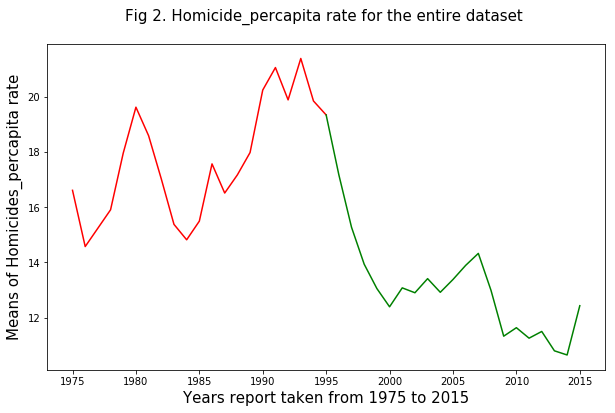

In [9]:
fig = plt.figure(figsize=(10,6))
ax1 = plt.plot( sample1_mean["homicides_percapita"], color='red')
plt.title('Fig 2. Homicide_percapita rate for the entire dataset \n', size=15)
ax2 = plt.plot(sample2_mean["homicides_percapita"], color='green');
plt.xlabel('Years report taken from 1975 to 2015', size=15)
plt.ylabel('Means of Homicides_percapita rate', size=15);

The idea here is that, the population mean should decrease except in some cities. The two samples should have fairly close mean value. We can't say the same about rate but means should stay consistent.  The above two area under the curve graphs show, homicides_percapita increasing for the first 20 years (sample1) and decreasing for the 2nd 20 years (sample2). The outcome of these graphs do show crime is going down.

## 4.0 Evaluation <a name="4.0_Evaluation"/><a> 

Next, we then look hypothesis testing using p-values and t-test evaluation. The first step is to re-emphasize the hypothesis and setup null and alternative testing rules. The hypothesis testing would look like this, 
Assumption. 1st 20 years == 1975 to 1995, and 2nd 20 years == 1996 to 2015

Testing method : Two tailed ttest

Null Hypothesis. The crime rate for the 1st 20 years = The crime rate for the second 20 years

Alternative Hypothesis: The crime rate for the 1st 20 years is != The crime rate for the 2nd 20 years

In [10]:
#here we compute the p-values in order to accept or fail to regect the null hyphothesis
print("Mean of Homicides for the 1st 20 years {}".format(sample1_mean["homicides_percapita"].mean()))
print("Mean of Homicides for the 2nd 20 years {}".format(sample2_mean["homicides_percapita"].mean()))


print('\n Now lets compute the p-values & t-tests\n')
# Are the test and control groups significantly different?
stats.ttest_ind(sample1_mean.mean(),   sample2_mean.mean())

Mean of Homicides for the 1st 20 years 17.73484604289477
Mean of Homicides for the 2nd 20 years 13.221994465180327

 Now lets compute the p-values & t-tests



Ttest_indResult(statistic=-0.10236828679699213, pvalue=0.9278035844797038)

For sample1, the p-value shows 0.9 which is significant to the mean

In [11]:
print("The t-test for the Alternative Hypothesis")
real_t_score = stats.ttest_ind(sample1_mean.mean(),   sample2_mean.mean(), equal_var=False)
real_t_score

The t-test for the Alternative Hypothesis


Ttest_indResult(statistic=-0.10236828679699213, pvalue=0.9279755880253486)

We can see that, the __t-test overestimates__ p-values for unequal variances

In [12]:
real_p_value = 1 - real_t_score.pvalue/2
real_p_value

0.5360122059873257

The ttest p-value is p=0.536 which is greater than 0.05. That makes this ttest significant and we fail to reject he null hypothesis.

So what does this mean for our hypothesis, is crime rate really decreasing in America? The answer is not that simple to answer "yes' or 'no'. However based on our homicide_percapita analysis, we will keep the null hypothesis with understanding that we have not proved it to be true beyond doubt. Furthermore, there is a statistical indication of decreasing crime rate from early 1990's till now. It’s not a drastic change but continuous decrease and a clear sign decrease for the 2nd 20 years. Keep in mind the rate at which the crimes increasing and decreasing is equal to each other. 

## 5.0 Conclusion & Future Improvements <a name="5.0_Conclusion_&_Future_Improvements"/><a> 

As we wrap up this report, the hypothesis we started with is that, the real crime rate is going down across us based on the data collected from keggle. All though some cities may experience higher crime rate for a period of time, like the City of Atlanta shown in Fig 1, the rate at which crime is moving seems to be on the decline for the 2nd 20 years. The data we used shows that the crime rate is changing at equial rate. 

For future improvements, gathering more data from other sources to support the hypothesis would be great. It will help build the confidence level much greater.



## References  <a name="References"/><a>

1. Project, T. M. (2017, February 10). Crime in Context, 1975-2015. Retrieved from https://www.kaggle.com/marshallproject/crime-rates